In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv('fraudPaymentData.txt', sep=',')
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0
...,...,...,...,...,...,...,...,...,...,...
179475,62,'C899813705','4','M','28007','M1823072687','28007','es_transportation',26.54,0.0
179476,62,'C771874671','5','M','28007','M348934600','28007','es_transportation',7.80,0.0
179477,62,'C1734585073','5','F','28007','M85975013','28007','es_food',21.21,0.0
179478,62,'C1373973501','4','F','28007','M348934600','28007','es_transportation',1.97,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179480 entries, 0 to 179479
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         179480 non-null  int64  
 1   customer     179480 non-null  object 
 2   age          179480 non-null  object 
 3   gender       179480 non-null  object 
 4   zipcodeOri   179480 non-null  object 
 5   merchant     179480 non-null  object 
 6   zipMerchant  179480 non-null  object 
 7   category     179479 non-null  object 
 8   amount       179479 non-null  float64
 9   fraud        179479 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 13.7+ MB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179479 entries, 0 to 179478
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         179479 non-null  int64  
 1   customer     179479 non-null  object 
 2   age          179479 non-null  object 
 3   gender       179479 non-null  object 
 4   zipcodeOri   179479 non-null  object 
 5   merchant     179479 non-null  object 
 6   zipMerchant  179479 non-null  object 
 7   category     179479 non-null  object 
 8   amount       179479 non-null  float64
 9   fraud        179479 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.1+ MB


In [9]:
df.describe()

,step,amount,fraud
count,179479.000000,179479.000000,179479.000000
mean,32.036383,39.231981,0.013896
std,17.864795,126.162911,0.117059
min,0.000000,0.000000,0.000000
25%,17.000000,13.730000,0.000000
50%,33.000000,26.940000,0.000000
75%,48.000000,42.725000,0.000000
max,62.000000,7665.560000,1.000000


In [13]:
# One Unique Value
df['zipcodeOri'].unique()
df.drop(columns=['zipcodeOri'], inplace=True)

In [15]:
# Same Process
df['zipMerchant'].unique()
df.drop(columns=['zipMerchant'], inplace=True)

In [18]:
# Irrelevant for our prob
df.drop(columns=['merchant', 'customer'], inplace=True)

In [37]:
df['age'].unique()

# Converting U = Unknown Age to 7
ageColumns = df['age'].str.replace('U', '7')

In [39]:
ageColumns = ageColumns.str.replace("'", '')
ageColumns = ageColumns.astype(int)

In [40]:
ageColumns

0         4
1         2
2         4
3         3
4         5
         ..
179474    3
179475    4
179476    5
179477    5
179478    4
Name: age, Length: 179479, dtype: int64

In [41]:
df['age'] = ageColumns

In [43]:
# Completed Type Convertion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179479 entries, 0 to 179478
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      179479 non-null  int64  
 1   age       179479 non-null  int64  
 2   gender    179479 non-null  object 
 3   category  179479 non-null  object 
 4   amount    179479 non-null  float64
 5   fraud     179479 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 9.6+ MB


In [44]:
df['gender'].unique()

array(["'M'", "'F'", "'E'", "'U'"], dtype=object)

In [46]:
# Enconding Gender Label
le = LabelEncoder()
df["gender"] = le.fit_transform( df["gender"] )

In [49]:
df['gender'].unique()

# 0 > Enterprise
# 1 > Fem
# 2 > Masc
# 3 > Unk

array([2, 1, 0, 3])

In [50]:
df['category'].unique()

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'"], dtype=object)

In [51]:
df["category"] = le.fit_transform( df["category"] )

In [53]:
df['category'].unique()

# 0 > Bars And Restaurants
# 1 > Contents
# 2 > Fashion
# 3 > Food
# 4 > Health
# 5 > Home
# 6 > Hotel Services
# 7 > Hyper
# 8 > Leisure
# 9 > Other Services
# 10 > Sports and Toys
# 11 > Tech
# 12 > Transportation
# 13 > Travel
# 14 > Wellness and Beauty

array([12,  4,  9,  3,  6,  0, 11, 10, 14,  7,  2,  5,  1, 13,  8])

In [56]:
df

,step,age,gender,category,amount,fraud
0,0,4,2,12,4.55,0.0
1,0,2,2,12,39.68,0.0
2,0,4,1,12,26.89,0.0
3,0,3,2,12,17.25,0.0
4,0,5,2,12,35.72,0.0
...,...,...,...,...,...,...
179474,62,3,1,12,2.71,0.0
179475,62,4,2,12,26.54,0.0
179476,62,5,2,12,7.80,0.0
179477,62,5,1,3,21.21,0.0


In [57]:
X = df.drop(columns=['fraud'])
Y = df['fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=77)

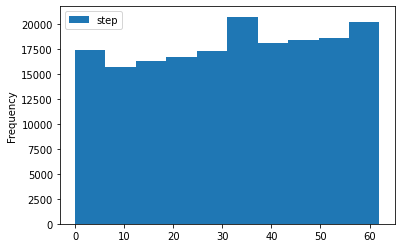

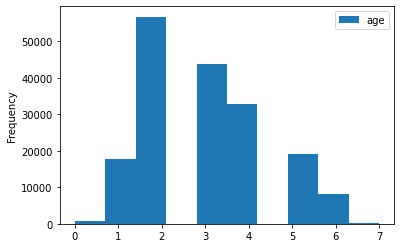

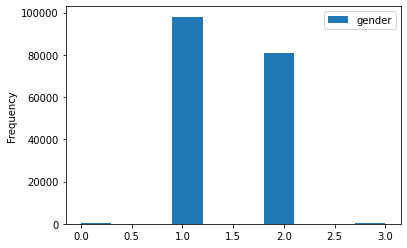

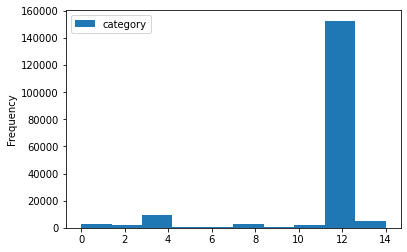

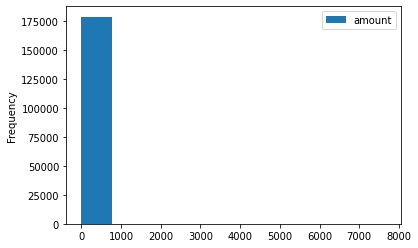

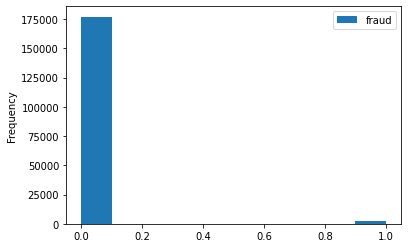

In [62]:
import matplotlib.pyplot as plt
for i in df.columns:
  df[i].plot.hist( legend=True )
  plt.show()

In [63]:
# Using MinMax Scaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [99]:
## Training And Evaluating Models

## KNN
## Forest
## HGBOOST
## XGBOOST

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics

def knnTrainAndFit(X_train, X_test, y_train, y_test, k=0):

  if k == 0:
    k = int( (len(y_train) + len(y_test)) ** 0.5 )

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"K -> {k} = ACC: {acc:.4f}, F1: {fone:.4f}")

def forestTrainAndFit(X_train, X_test, y_train, y_test, estimators, depth, impurity):

  forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=77, min_impurity_decrease=impurity)
  forest.fit(X_train, y_train)

  y_pred = forest.predict(X_test)
  probs = forest.predict_proba(X_test)

  auc = metrics.roc_auc_score(y_test, probs[:,1])
  acc = metrics.accuracy_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"Estim -> {estimators} = Depth: {depth}, Impurity: {impurity}, Acurácia: {acc:.4f}, F1 Score: {fone:.4f}, AUC: {auc:.4f}")

def hgboostTrainAndFit(X_train, X_test, y_train, y_test, depth):

  hg = HistGradientBoostingClassifier(max_depth=depth, random_state=77)
  hg.fit(X_train, y_train)

  y_pred = hg.predict(X_test)
  probs = hg.predict_proba(X_test)

  auc = metrics.roc_auc_score(y_test, probs[:,1])
  acc = metrics.accuracy_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"Depth -> {depth}, Acurácia: {acc:.4f}, F1 Score: {fone:.4f}, AUC: {auc:.4f}")

def xgboostTrainAndFit(X_train, X_test, y_train, y_test, estimators, depth):

  xg = xgb.XGBClassifier(n_estimators=estimators, max_depth=depth, booster='gbtree', learning_rate=0.01)
  xg.fit(X_train, y_train, eval_set=[(X_train, y_train)])

  y_pred = xg.predict(X_test)
  probs = xg.predict_proba(X_test)

  auc = metrics.roc_auc_score(y_test, probs[:,1])
  acc = metrics.accuracy_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  print(f"Estim -> {estimators} = Depth: {depth}, Acurácia: {acc:.4f}, F1 Score: {fone:.4f}, AUC: {auc:.4f}")

In [ ]:
## Tests With KNN

knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 11)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 12)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 13)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 14)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 15)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 16)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 17)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 19)
knnTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20)

In [78]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 1, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 5, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 11, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 12, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 13, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 14, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 15, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 16, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 17, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 19, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 22, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 24, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 26, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 28, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 30, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 35, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 40, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 45, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 50, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 60, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 70, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 80, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 90, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 100, 5, 0.0001)

Estim -> 1 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9855, F1 Score: 0.0000, AUC: 0.5000
Estim -> 5 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9903, F1 Score: 0.5199, AUC: 0.9880
Estim -> 10 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9931, F1 Score: 0.7070, AUC: 0.9879
Estim -> 11 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9932, F1 Score: 0.7116, AUC: 0.9879
Estim -> 12 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9936, F1 Score: 0.7311, AUC: 0.9879
Estim -> 13 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9932, F1 Score: 0.7117, AUC: 0.9879
Estim -> 14 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7281, AUC: 0.9879
Estim -> 15 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9925, F1 Score: 0.6675, AUC: 0.9879
Estim -> 16 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9928, F1 Score: 0.6861, AUC: 0.9881
Estim -> 17 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7281, AUC: 0.9888
Estim -> 18 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7288, AUC: 0.9888
Estim -> 19 

In [80]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 1, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 2, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 3, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 4, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 6, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 7, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 8, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 9, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 10, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 11, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 12, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 13, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 14, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 15, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 20, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 25, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 30, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 35, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 40, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 45, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 50, 0.0001)

Estim -> 18 = Depth: 1, Impurity: 0.0001, Acurácia: 0.9855, F1 Score: 0.0000, AUC: 0.9611
Estim -> 18 = Depth: 2, Impurity: 0.0001, Acurácia: 0.9899, F1 Score: 0.4894, AUC: 0.9897
Estim -> 18 = Depth: 3, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7285, AUC: 0.9888
Estim -> 18 = Depth: 4, Impurity: 0.0001, Acurácia: 0.9933, F1 Score: 0.7183, AUC: 0.9889
Estim -> 18 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7288, AUC: 0.9888
Estim -> 18 = Depth: 6, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7279, AUC: 0.9887
Estim -> 18 = Depth: 7, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7279, AUC: 0.9887
Estim -> 18 = Depth: 8, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7279, AUC: 0.9887
Estim -> 18 = Depth: 9, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7279, AUC: 0.9887
Estim -> 18 = Depth: 10, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7279, AUC: 0.9887
Estim -> 18 = Depth: 11, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7279, AUC: 0.9887
Estim ->

In [83]:
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.1)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.01)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.00001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000002)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000003)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000004)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000005)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000006)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000007)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000008)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000009)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.00000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.000000001)
forestTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18, 5, 0.0000000001)

Estim -> 18 = Depth: 5, Impurity: 0.1, Acurácia: 0.9855, F1 Score: 0.0000, AUC: 0.5000
Estim -> 18 = Depth: 5, Impurity: 0.01, Acurácia: 0.9855, F1 Score: 0.0000, AUC: 0.8306
Estim -> 18 = Depth: 5, Impurity: 0.0001, Acurácia: 0.9935, F1 Score: 0.7288, AUC: 0.9888
Estim -> 18 = Depth: 5, Impurity: 1e-05, Acurácia: 0.9936, F1 Score: 0.7342, AUC: 0.9926
Estim -> 18 = Depth: 5, Impurity: 1e-06, Acurácia: 0.9936, F1 Score: 0.7372, AUC: 0.9926
Estim -> 18 = Depth: 5, Impurity: 1e-07, Acurácia: 0.9936, F1 Score: 0.7397, AUC: 0.9926
Estim -> 18 = Depth: 5, Impurity: 2e-07, Acurácia: 0.9936, F1 Score: 0.7395, AUC: 0.9926
Estim -> 18 = Depth: 5, Impurity: 3e-07, Acurácia: 0.9935, F1 Score: 0.7358, AUC: 0.9926
Estim -> 18 = Depth: 5, Impurity: 4e-07, Acurácia: 0.9935, F1 Score: 0.7358, AUC: 0.9926
Estim -> 18 = Depth: 5, Impurity: 5e-07, Acurácia: 0.9936, F1 Score: 0.7372, AUC: 0.9926
Estim -> 18 = Depth: 5, Impurity: 6e-07, Acurácia: 0.9936, F1 Score: 0.7372, AUC: 0.9926
Estim -> 18 = Depth: 5,

In [93]:
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 0, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 1, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 2, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 3, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 5, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 6, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 7, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 8, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 9, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10, 5)


Estim -> 0 = Depth: 5, Acurácia: 0.9855, F1 Score: 0.0000, AUC: 0.5000
[0]	validation_0-error:0.00608
Estim -> 1 = Depth: 5, Acurácia: 0.9939, F1 Score: 0.7483, AUC: 0.9807
[0]	validation_0-error:0.00608
[1]	validation_0-error:0.006031
Estim -> 2 = Depth: 5, Acurácia: 0.9939, F1 Score: 0.7483, AUC: 0.9807
[0]	validation_0-error:0.00608
[1]	validation_0-error:0.006031
[2]	validation_0-error:0.006031
Estim -> 3 = Depth: 5, Acurácia: 0.9939, F1 Score: 0.7483, AUC: 0.9808
[0]	validation_0-error:0.00608
[1]	validation_0-error:0.006031
[2]	validation_0-error:0.006031
[3]	validation_0-error:0.006031
Estim -> 4 = Depth: 5, Acurácia: 0.9940, F1 Score: 0.7512, AUC: 0.9808
[0]	validation_0-error:0.00608
[1]	validation_0-error:0.006031
[2]	validation_0-error:0.006031
[3]	validation_0-error:0.006031
[4]	validation_0-error:0.006031
Estim -> 5 = Depth: 5, Acurácia: 0.9939, F1 Score: 0.7483, AUC: 0.9810
[0]	validation_0-error:0.00608
[1]	validation_0-error:0.006031
[2]	validation_0-error:0.006031
[3]	

In [95]:
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 1)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 2)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 3)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 4)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 5)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 6)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 7)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 8)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 9)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 10)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 15)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 20)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 25)
xgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4, 30)


[0]	validation_0-error:0.006811
[1]	validation_0-error:0.006811
[2]	validation_0-error:0.006811
[3]	validation_0-error:0.006811
Estim -> 4 = Depth: 1, Acurácia: 0.9933, F1 Score: 0.7360, AUC: 0.8239
[0]	validation_0-error:0.006811
[1]	validation_0-error:0.006811
[2]	validation_0-error:0.006811
[3]	validation_0-error:0.006811
Estim -> 4 = Depth: 2, Acurácia: 0.9933, F1 Score: 0.7360, AUC: 0.9014
[0]	validation_0-error:0.006387
[1]	validation_0-error:0.006345
[2]	validation_0-error:0.006345
[3]	validation_0-error:0.006387
Estim -> 4 = Depth: 3, Acurácia: 0.9936, F1 Score: 0.7323, AUC: 0.9280
[0]	validation_0-error:0.006192
[1]	validation_0-error:0.006192
[2]	validation_0-error:0.006205
[3]	validation_0-error:0.006219
Estim -> 4 = Depth: 4, Acurácia: 0.9936, F1 Score: 0.7455, AUC: 0.9780
[0]	validation_0-error:0.00608
[1]	validation_0-error:0.006031
[2]	validation_0-error:0.006031
[3]	validation_0-error:0.006031
Estim -> 4 = Depth: 5, Acurácia: 0.9940, F1 Score: 0.7512, AUC: 0.9808
[0]	va

In [103]:
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 1)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 2)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 3)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 4)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 5)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 6)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 7)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 8)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 9)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 10)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 11)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 12)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 13)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 14)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 16)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 18)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 20)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 25)
hgboostTrainAndFit(X_train_norm, X_test_norm, Y_train, Y_test, 30)

Depth -> 1, Acurácia: 0.9929, F1 Score: 0.7355, AUC: 0.9896
Depth -> 2, Acurácia: 0.9941, F1 Score: 0.7616, AUC: 0.9928
Depth -> 3, Acurácia: 0.9940, F1 Score: 0.7587, AUC: 0.9935
Depth -> 4, Acurácia: 0.9942, F1 Score: 0.7682, AUC: 0.9932
Depth -> 5, Acurácia: 0.9942, F1 Score: 0.7663, AUC: 0.9932
Depth -> 6, Acurácia: 0.9941, F1 Score: 0.7646, AUC: 0.9936
Depth -> 7, Acurácia: 0.9943, F1 Score: 0.7696, AUC: 0.9932
Depth -> 8, Acurácia: 0.9942, F1 Score: 0.7665, AUC: 0.9931
Depth -> 9, Acurácia: 0.9943, F1 Score: 0.7691, AUC: 0.9931
Depth -> 10, Acurácia: 0.9942, F1 Score: 0.7665, AUC: 0.9931
Depth -> 11, Acurácia: 0.9941, F1 Score: 0.7651, AUC: 0.9932
Depth -> 12, Acurácia: 0.9943, F1 Score: 0.7720, AUC: 0.9930
Depth -> 13, Acurácia: 0.9942, F1 Score: 0.7697, AUC: 0.9932
Depth -> 14, Acurácia: 0.9943, F1 Score: 0.7747, AUC: 0.9931
Depth -> 16, Acurácia: 0.9943, F1 Score: 0.7725, AUC: 0.9930
Depth -> 18, Acurácia: 0.9943, F1 Score: 0.7720, AUC: 0.9929
Depth -> 20, Acurácia: 0.9942, F1

In [110]:
from joblib import dump, load

In [108]:
def hgboostEvaluateModel(X_train, X_test, y_train, y_test, depth):

  hg = HistGradientBoostingClassifier(max_depth=depth, random_state=77)
  hg.fit(X_train, y_train)

  y_pred = hg.predict(X_test)
  probs = hg.predict_proba(X_test)

  auc = metrics.roc_auc_score(y_test, probs[:,1])
  acc = metrics.accuracy_score(y_test, y_pred)
  fone = metrics.f1_score(y_test, y_pred)

  return hg

hg = hgboostEvaluateModel(X_train_norm, X_test_norm, Y_train, Y_test, 14)

In [111]:
dump(hg, 'HistGradientBoostingClassifierCyberSprint.joblib') 

['HistGradientBoostingClassifierCyberSprint.joblib']

In [117]:
dump(norm, 'MinMaxScalerHGBoostCyberSprint.joblib')

['MinMaxScalerHGBoostCyberSprint.joblib']